In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("traffic_accidents.csv",encoding= 'unicode_escape',  index_col=0)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 209306 entries, 07/29/2023 01:00:00 PM to 12/16/2022 12:10:00 PM
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   traffic_control_device         209306 non-null  object
 1   weather_condition              209306 non-null  object
 2   lighting_condition             209306 non-null  object
 3   first_crash_type               209306 non-null  object
 4   trafficway_type                209306 non-null  object
 5   alignment                      209306 non-null  object
 6   roadway_surface_cond           209306 non-null  object
 7   road_defect                    209306 non-null  object
 8   crash_type                     209306 non-null  object
 9   intersection_related_i         209306 non-null  object
 10  damage                         209306 non-null  object
 11  prim_contributory_cause        209306 non-null  object
 12  num_units   

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with 'UNKNOWN'
df.fillna({'weather_condition': 'UNKNOWN',
           'lighting_condition': 'UNKNOWN',
           'roadway_surface_cond': 'UNKNOWN',
           'most_severe_injury': 'UNKNOWN'}, inplace=True)

categorical_cols = ['traffic_control_device', 'weather_condition', 'lighting_condition',
                    'first_crash_type', 'trafficway_type', 'alignment',
                    'roadway_surface_cond', 'crash_type', 'most_severe_injury']
for col in categorical_cols:
    df[col] = df[col].astype('category')

traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64


<ipython-input-29-63dc426f2a2b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crash_type_counts.index, y=crash_type_counts.values, palette='viridis')


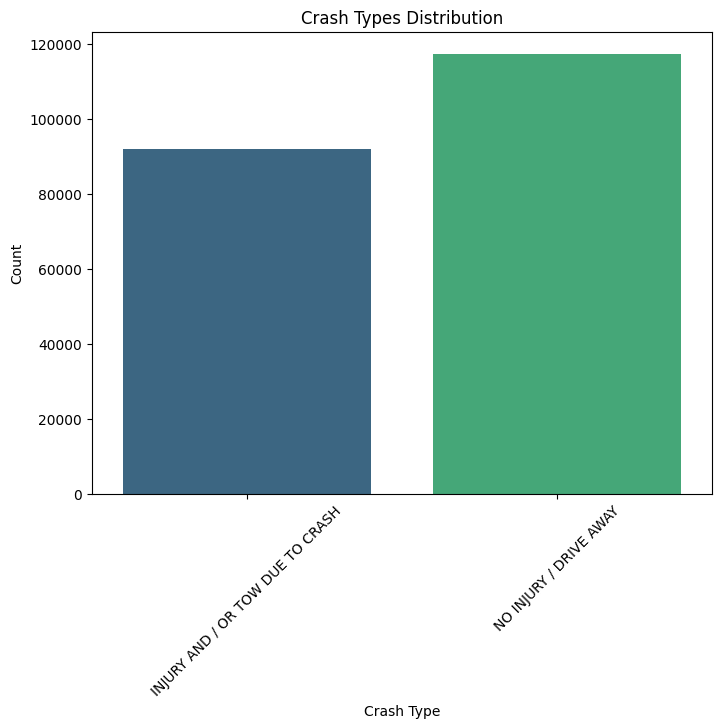

In [ ]:
# Count crash types & plot a bar chart
crash_type_counts = df['crash_type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=crash_type_counts.index, y=crash_type_counts.values, palette='viridis')
plt.title('Crash Types Distribution')
plt.xlabel('Crash Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

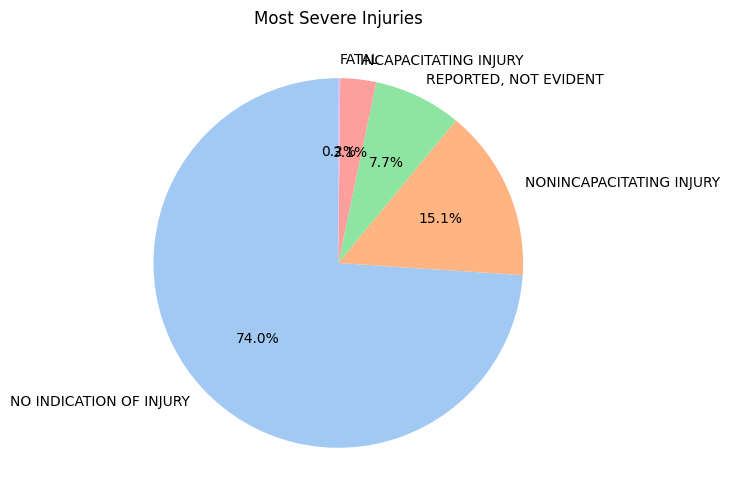

In [ ]:
# Count most severe injuries & plot a pie chart
injury_counts = df['most_severe_injury'].value_counts()
plt.figure(figsize=(8, 6))
injury_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Most Severe Injuries')
plt.ylabel('')
plt.show()

<ipython-input-31-2f055639e458>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='coolwarm')


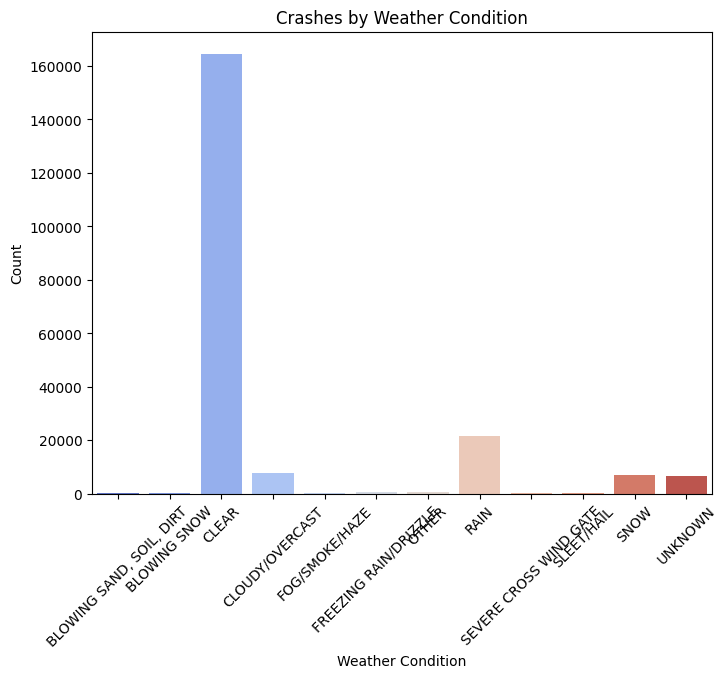

In [ ]:
# Count crashes by weather condition & plotting a bar chart
weather_counts = df['weather_condition'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='coolwarm')
plt.title('Crashes by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-32-8169cf12efac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lighting_counts.index, y=lighting_counts.values, palette='magma')


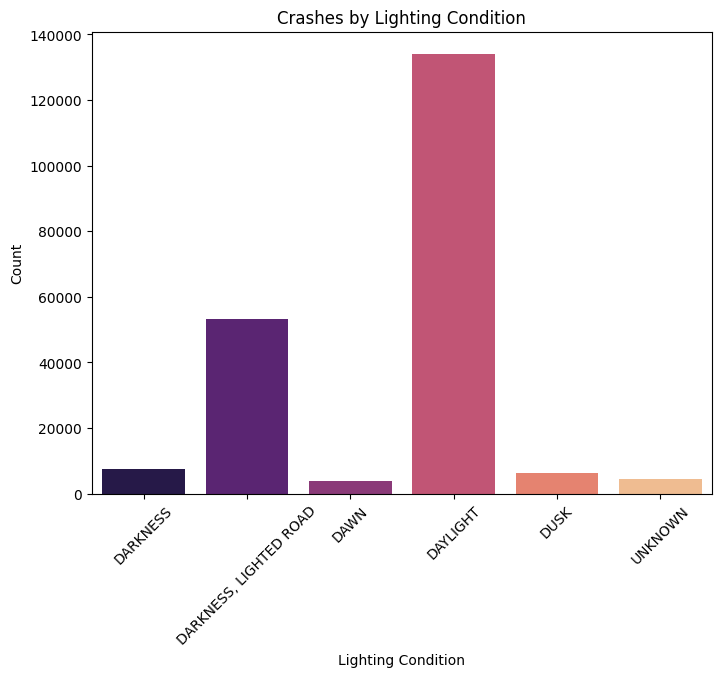

In [ ]:
# Count crashes by lighting condition plotting a bar chart
lighting_counts = df['lighting_condition'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=lighting_counts.index, y=lighting_counts.values, palette='magma')
plt.title('Crashes by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

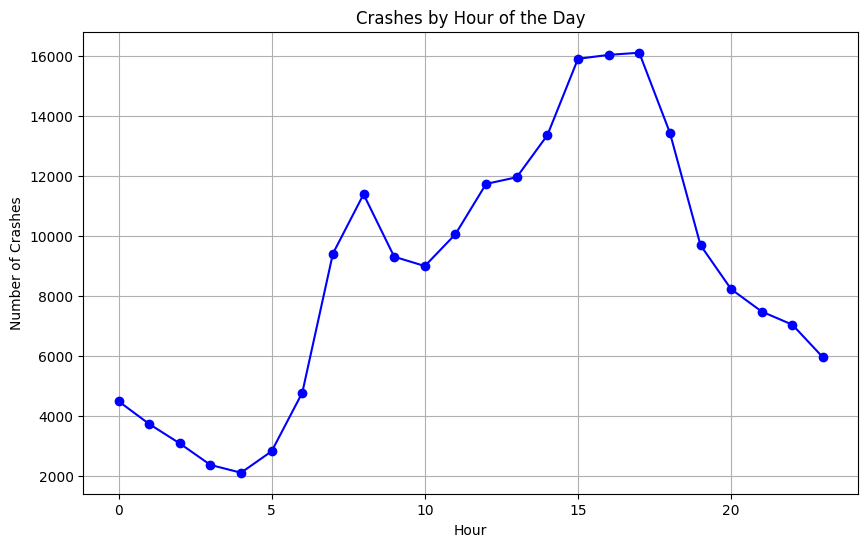

In [ ]:
# Group by hour of the day plotting a line chart
hourly_crashes = df.groupby('crash_hour').size()
plt.figure(figsize=(10, 6))
hourly_crashes.plot(kind='line', marker='o', color='blue')
plt.title('Crashes by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

<ipython-input-36-33941ed97310>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_crashes.index, y=weekly_crashes.values, palette='plasma')


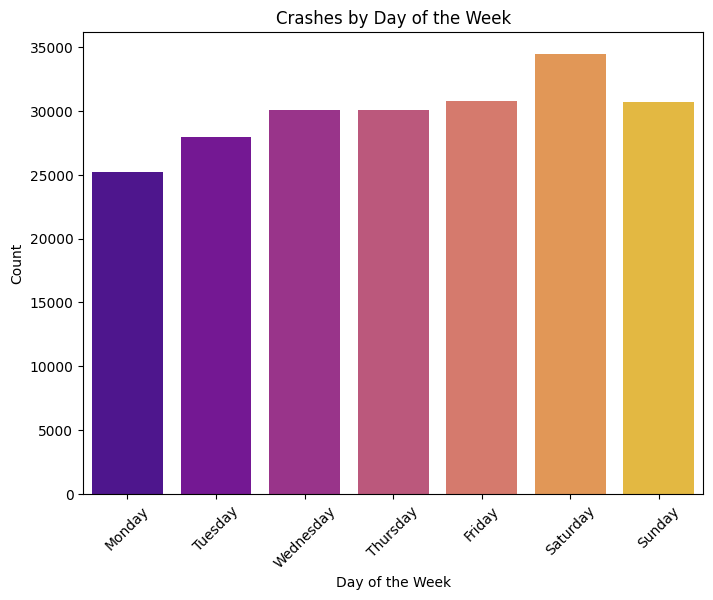

In [ ]:
# Group by day of the week plotting a bar chart
weekly_crashes = df.groupby('crash_day_of_week').size()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_crashes.index = [days[i-1] for i in weekly_crashes.index]
plt.figure(figsize=(8, 6))
sns.barplot(x=weekly_crashes.index, y=weekly_crashes.values, palette='plasma')
plt.title('Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

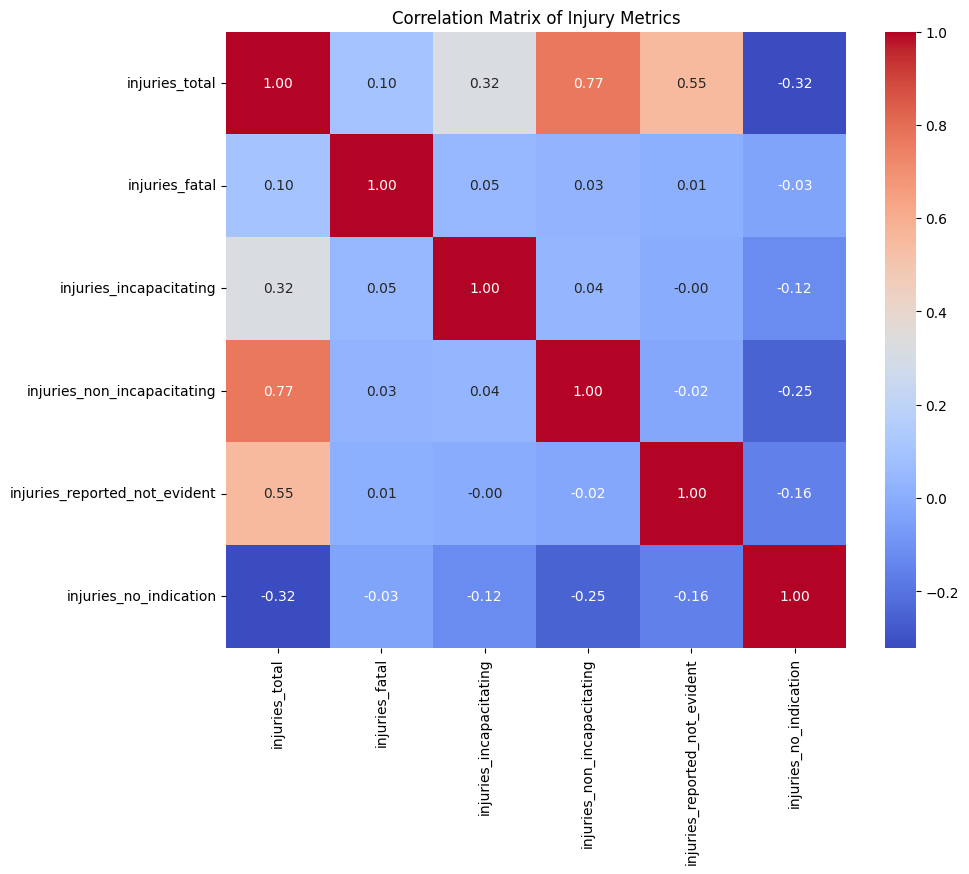

In [ ]:
# Correlation heatmap
numeric_cols = ['injuries_total', 'injuries_fatal', 'injuries_incapacitating',
                'injuries_non_incapacitating', 'injuries_reported_not_evident',
                'injuries_no_indication']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Injury Metrics')
plt.show()